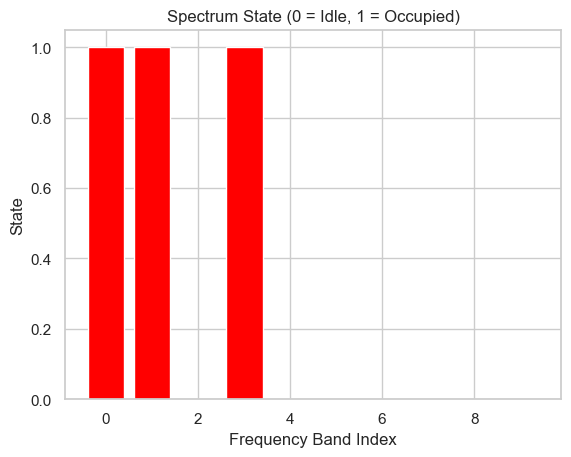

Step 1: Action: 3, Reward: -1.1


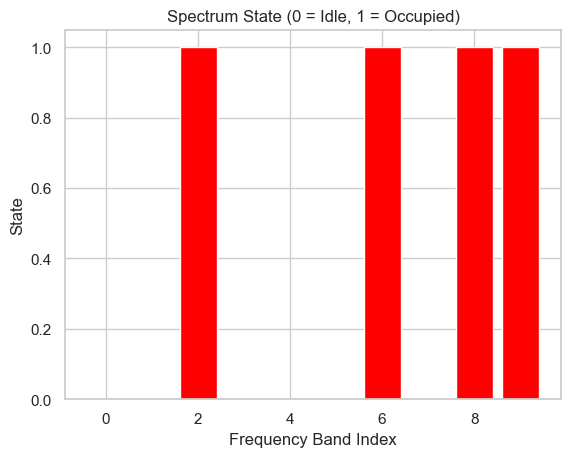

Step 2: Action: 9, Reward: -1.1


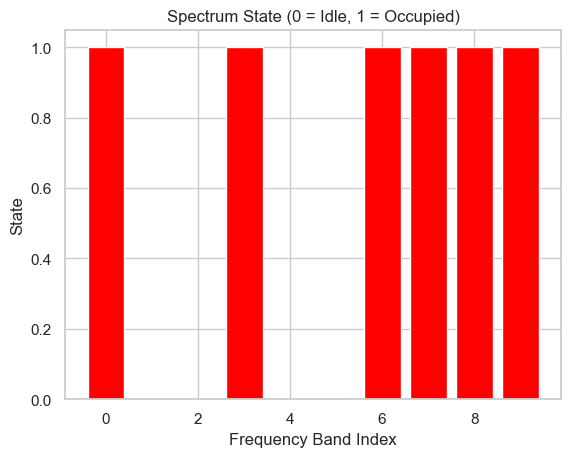

Step 3: Action: 1, Reward: 0.9


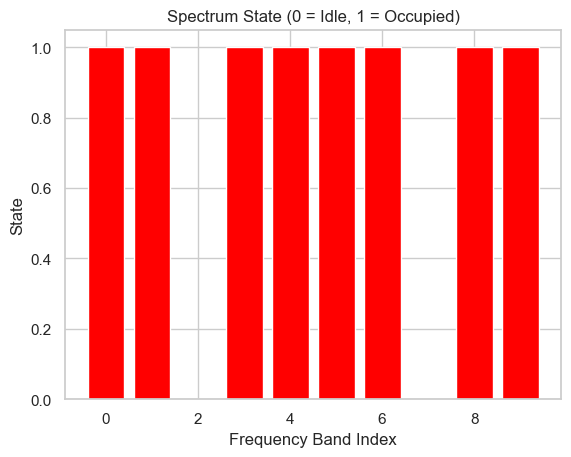

Step 4: Action: 5, Reward: -1.1


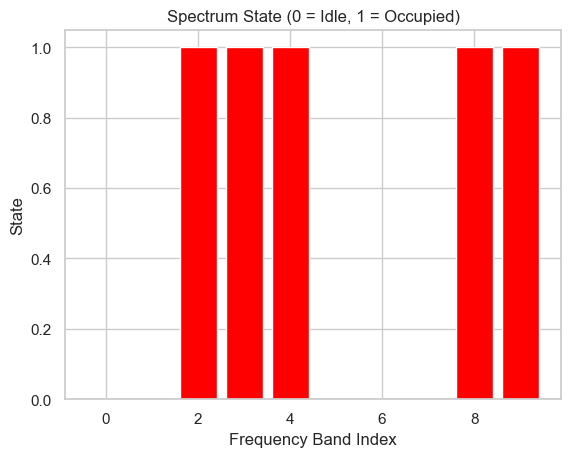

Step 5: Action: 0, Reward: 0.9


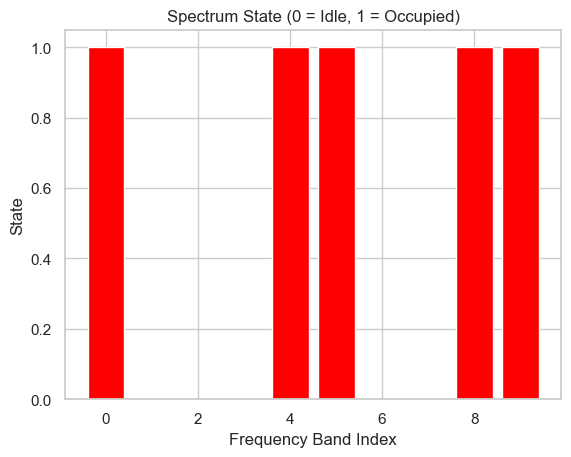

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class SpectrumEnvironment:
    def __init__(self, num_bands=10, energy_cost=0.1):
        self.num_bands = num_bands  # Total number of frequency bands
        self.energy_cost = energy_cost  # Penalty for sensing
        self.state = self._generate_spectrum_state()  # Current state of the spectrum
        self.total_reward = 0  # Track total reward for visualization

    def _generate_spectrum_state(self):
        """Randomize the spectrum state: 0 (idle) or 1 (occupied)."""
        return np.random.choice([0, 1], size=self.num_bands)

    def step(self, action):
        """
        Simulate sensing a specific band.
        action: Integer representing the index of the band to sense.
        Returns:
            state: Updated spectrum state.
            reward: Reward based on action.
        """
        reward = 0
        # Reward for sensing an idle band
        if self.state[action] == 0:
            reward = 1
        else:  # Penalty for sensing an occupied band
            reward = -1
        
        # Energy cost is deducted regardless of the outcome
        reward -= self.energy_cost
        self.total_reward += reward

        # Randomize the spectrum state for the next step
        self.state = self._generate_spectrum_state()

        return self.state, reward

    def reset(self):
        """Reset the environment to an initial state."""
        self.state = self._generate_spectrum_state()
        self.total_reward = 0
        return self.state

    def render(self):
        """Visualize the spectrum state."""
        plt.bar(range(self.num_bands), self.state, color=['green' if x == 0 else 'red' for x in self.state])
        plt.title("Spectrum State (0 = Idle, 1 = Occupied)")
        plt.xlabel("Frequency Band Index")
        plt.ylabel("State")
        plt.show()

# Create and test the environment
env = SpectrumEnvironment(num_bands=10)

# Reset the environment and visualize the initial state
state = env.reset()
env.render()

# Simulate a few steps with random actions
for step in range(5):
    action = random.randint(0, env.num_bands - 1)  # Randomly select a band to sense
    next_state, reward = env.step(action)
    print(f"Step {step + 1}: Action: {action}, Reward: {reward}")
    env.render()
    time.sleep(1)  # Pause for visualization
